In [581]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

# 1. SC 데이터 처리

In [582]:
sc = pd.read_csv('supply chain data US 2010.csv', encoding="ISO-8859-1")

In [583]:
sc['START_DATE'] = pd.to_datetime(sc['START_DATE'])
sc['END_DATE'] = pd.to_datetime(sc['END_DATE'])

In [584]:
sc_ge_rtx = sc[(sc['FDS_ID'] == "GE-US") & (sc['FDS_ID.1'] == "RTX-US")]
sc_ge_rtx

,START_DATE,END_DATE,SOURCE_ENTITY_ID,FDS_ID,SOURCE_ENTITY,TARGET_ENTITY_ID,FDS_ID.1,TARGET_ENTITY,REL_TYPE,REVENUE_PCT
118,2020-04-06,NaT,000KYG-E,GE-US,General Electric Co.,0M6FSJ-E,RTX-US,Raytheon Technologies Corp.,SUPPLIER,NaN


In [585]:
sc_ge = sc[sc['FDS_ID'] == "GE-US"]
sc_ge

,START_DATE,END_DATE,SOURCE_ENTITY_ID,FDS_ID,SOURCE_ENTITY,TARGET_ENTITY_ID,FDS_ID.1,TARGET_ENTITY,REL_TYPE,REVENUE_PCT
118,2020-04-06,NaT,000KYG-E,GE-US,General Electric Co.,0M6FSJ-E,RTX-US,Raytheon Technologies Corp.,SUPPLIER,NaN
485,2016-03-01,2017-03-03,000KYG-E,GE-US,General Electric Co.,0010VG-E,BHP-AU,BHP Group Ltd.,CUSTOMER,NaN
714,2014-04-25,2016-02-29,000KYG-E,GE-US,General Electric Co.,0010TK-E,NaN,"Castle Harlan, Inc.",CUSTOMER,NaN
1062,2016-03-01,2017-03-03,000KYG-E,GE-US,General Electric Co.,0077YX-E,META-US,"Meta Platforms, Inc.",CUSTOMER,NaN
1643,2018-03-06,2019-04-09,000KYG-E,GE-US,General Electric Co.,08SRD2-E,NaN,Faasa Aviación SA,CUSTOMER,NaN
...,...,...,...,...,...,...,...,...,...,...
305130,2012-07-12,2014-04-01,000KYG-E,GE-US,General Electric Co.,003KJL-E,ORG-AU,Origin Energy Ltd.,CUSTOMER,NaN
305293,2016-03-01,2017-03-03,000KYG-E,GE-US,General Electric Co.,000HN8-E,NaN,The Dow Chemical Co.,CUSTOMER,NaN
305404,2013-04-12,2014-04-01,000KYG-E,GE-US,General Electric Co.,003KSV-E,JBLU-US,JetBlue Airways Corp.,CUSTOMER,NaN
305652,2018-03-07,2019-04-09,000KYG-E,GE-US,General Electric Co.,06R6WL-E,NaN,Government of Cambodia,CUSTOMER,NaN


In [586]:
sc['REL_TYPE'].value_counts()

CUSTOMER    232501
SUPPLIER     73507
Name: REL_TYPE, dtype: int64

In [587]:
# Customer만 필터

sc = sc[sc['REL_TYPE'] == "CUSTOMER"]

<AxesSubplot:ylabel='Frequency'>

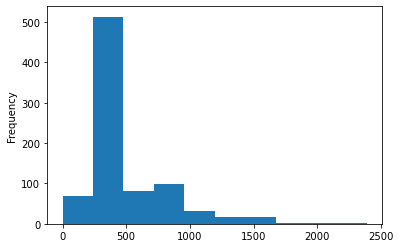

In [588]:
sc_ge['Rel_periods'] = (sc_ge['END_DATE'] - sc_ge['START_DATE']).dt.days
sc_ge['Rel_periods'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

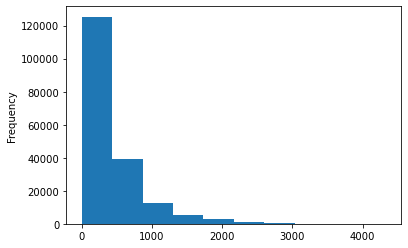

In [589]:
# 대부분의 relationship이 2년 이하. Disclosure discretion 때문인지? 아니면 실제로 이렇게 회전률이 높은건지?
# 일단 가장 큰 Supplier/Customer의 relationship periods 확인.

sc['Rel_periods'] = (sc['END_DATE'] - sc['START_DATE']).dt.days
sc['Rel_periods'].plot(kind='hist')

# 2. Price 데이터 처리

In [590]:
price = pd.read_csv('US_prices_mcap.txt', sep='\t')

c:\Users\jchoi02\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [591]:
price['Ticker'] = price['Ticker'].astype(str)

In [592]:
price = price.drop(['Unnamed: 0'], axis=1)

In [593]:
price['Periods'] = pd.to_datetime(price['Periods'])

In [594]:
price = price.dropna(subset=['PRICE', 'PRICE_USD', 'MCAP_USD'])

In [595]:
price

,Company Name,Periods,Ticker,PRICE,PRICE_USD,MCAP_USD
666,AAB National Company,2015-06-30,AQBN-US,0.00,0.00,0.03
667,AAB National Company,2015-07-31,AQBN-US,0.00,0.00,0.00
668,AAB National Company,2015-08-31,AQBN-US,0.00,0.00,0.00
669,AAB National Company,2015-09-30,AQBN-US,0.00,0.00,0.00
670,AAB National Company,2015-10-30,AQBN-US,0.00,0.00,0.00
...,...,...,...,...,...,...
6394045,Wave Life Sciences Ltd.,2022-01-31,WVE-US,2.19,2.19,131.05
6394046,Wave Life Sciences Ltd.,2022-02-28,WVE-US,2.46,2.46,149.37
6394047,Wave Life Sciences Ltd.,2022-03-31,WVE-US,2.00,2.00,121.72
6394048,Wave Life Sciences Ltd.,2022-04-29,WVE-US,1.95,1.95,118.68


# 3. 각 SC 엔트리 별 시총이 가장 큰 Customer를 price에서 찾아서 합병

START_DATE 기준

In [596]:
# sc에서 티커없는 Customer 제외 (by 칼럼 NA 제외)

price = price.dropna(subset=['Ticker'])
sc = sc.dropna(subset=['FDS_ID.1'])

In [597]:
# on 칼럼에도 NA 있으면 안됨

price = price.dropna(subset=['Periods', 'MCAP_USD'])
sc = sc.dropna(subset=['START_DATE'])

In [598]:
sc_n = sc[['START_DATE', 'FDS_ID.1']]

In [599]:
price_n = price[['Periods', 'Ticker', 'MCAP_USD']]

In [600]:
# merge direction을 쓸 것이기 때문에 좌우 df 정렬 필요

price_n = price.sort_values('Periods')
sc_n = sc.sort_values('START_DATE')

In [601]:
merge = pd.merge_asof(sc_n, price_n, direction='backward', left_on='START_DATE', right_on='Periods', left_by='FDS_ID.1', right_by='Ticker')
merge

,START_DATE,END_DATE,SOURCE_ENTITY_ID,FDS_ID,SOURCE_ENTITY,TARGET_ENTITY_ID,FDS_ID.1,TARGET_ENTITY,REL_TYPE,REVENUE_PCT,Rel_periods,Company Name,Periods,Ticker,PRICE,PRICE_USD,MCAP_USD
0,2010-01-05,2010-05-13,003L98-E,NZ-US,Netezza LLC.,003K16-E,KPN-NL,Royal KPN NV,CUSTOMER,NaN,128.0,NaN,NaT,NaN,NaN,NaN,NaN
1,2010-01-06,2011-12-28,000WMF-E,SII.XX1-US,"Smith International, Inc.",005LMV-E,PESA-AR,Petrobras Argentina SA,CUSTOMER,NaN,721.0,NaN,NaT,NaN,NaN,NaN,NaN
2,2010-01-06,2011-09-13,000M0T-E,IIVI-US,"II-VI, Inc.",0064CH-E,ELOS-US,Syneron Medical Ltd.,CUSTOMER,NaN,615.0,Syneron Medical Ltd,2009-12-31,ELOS-US,10.45,10.45,288.37
3,2010-01-07,2010-11-19,07NG3D-E,WWAY-US,Contanda LLC,003P6D-E,XTA-GB,Xstrata Plc,CUSTOMER,NaN,316.0,NaN,NaT,NaN,NaN,NaN,NaN
4,2010-01-07,2010-11-19,07NG3D-E,WWAY-US,Contanda LLC,000BMP-E,AGU-CA,"Agrium, Inc.",CUSTOMER,NaN,316.0,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140048,2022-06-28,NaT,0HNKR3-E,ILPT-US,Industrial Logistics Properties Trust,001TR0-E,FDX-US,FedEx Corp.,CUSTOMER,4.8,NaN,FedEx Corporation,2022-05-31,FDX-US,224.58,224.58,58206.25
140049,2022-06-28,NaT,00FMQN-E,S-US,"SentinelOne, Inc.",05KM3S-E,035420-KR,NAVER Corp.,CUSTOMER,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
140050,2022-06-28,NaT,0015ZX-E,RPT-US,RPT Realty,0040KQ-E,DKS-US,"Dick's Sporting Goods, Inc.",CUSTOMER,3.8,NaN,"Dick's Sporting Goods, Inc.",2022-05-31,DKS-US,81.23,81.23,6541.23
140051,2022-06-28,NaT,0HNKR3-E,ILPT-US,Industrial Logistics Properties Trust,0013FQ-E,AES-US,The AES Corp.,CUSTOMER,1.0,NaN,AES Corporation,2022-05-31,AES-US,22.04,22.04,14719.63


In [602]:
# 왜 22년6월28일 삼성과 네이버 MCAP_USD가 없나?
# 각 Source_entity의 기간별 MCAP_USD가 가장 큰 Customer만 남기는 방법은? 예. 22년6월28일 기준 SentinelOne은 Google만 남기기.

merge_s = merge[merge['FDS_ID'] == "S-US"]
merge_s

,START_DATE,END_DATE,SOURCE_ENTITY_ID,FDS_ID,SOURCE_ENTITY,TARGET_ENTITY_ID,FDS_ID.1,TARGET_ENTITY,REL_TYPE,REVENUE_PCT,Rel_periods,Company Name,Periods,Ticker,PRICE,PRICE_USD,MCAP_USD
140017,2022-06-28,NaT,00FMQN-E,S-US,"SentinelOne, Inc.",0FPWZZ-E,GOOGL-US,"Alphabet, Inc.",CUSTOMER,NaN,NaN,Alphabet Inc. Class A,2022-05-31,GOOGL-US,2275.24,2275.24,1500081.79
140018,2022-06-28,NaT,00FMQN-E,S-US,"SentinelOne, Inc.",000VPP-E,005930-KR,"Samsung Electronics Co., Ltd.",CUSTOMER,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
140023,2022-06-28,NaT,00FMQN-E,S-US,"SentinelOne, Inc.",064F1F-E,SFLY-US,"Shutterfly, Inc.",CUSTOMER,NaN,NaN,"Shutterfly, Inc.",2019-08-30,SFLY-US,50.88,50.88,1750.07
140037,2022-06-28,NaT,00FMQN-E,S-US,"SentinelOne, Inc.",000CFP-E,ADSK-US,"Autodesk, Inc.",CUSTOMER,NaN,NaN,"Autodesk, Inc.",2022-05-31,ADSK-US,207.75,207.75,45191.26
140049,2022-06-28,NaT,00FMQN-E,S-US,"SentinelOne, Inc.",05KM3S-E,035420-KR,NAVER Corp.,CUSTOMER,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [603]:
# 우선 MCAP_USD와 FDS_ID가 null인 row는 제거
# 14만개에서 8만2천개로 감소

merge = merge.dropna(subset=['FDS_ID', 'MCAP_USD'])
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81618 entries, 2 to 140052
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   START_DATE        81618 non-null  datetime64[ns]
 1   END_DATE          66268 non-null  datetime64[ns]
 2   SOURCE_ENTITY_ID  81618 non-null  object        
 3   FDS_ID            81618 non-null  object        
 4   SOURCE_ENTITY     81618 non-null  object        
 5   TARGET_ENTITY_ID  81618 non-null  object        
 6   FDS_ID.1          81618 non-null  object        
 7   TARGET_ENTITY     81618 non-null  object        
 8   REL_TYPE          81618 non-null  object        
 9   REVENUE_PCT       20124 non-null  float64       
 10  Rel_periods       66268 non-null  float64       
 11  Company Name      81618 non-null  object        
 12  Periods           81618 non-null  datetime64[ns]
 13  Ticker            81618 non-null  object        
 14  PRICE             816

In [604]:
# SentinelOne 기준으로 볼때 구글 정상적으로 식별 됨.

merge.groupby(['START_DATE', 'FDS_ID'])['MCAP_USD'].max()

START_DATE  FDS_ID    
2010-01-06  IIVI-US           288.37
2010-01-07  ATSC-US          1313.06
            WWAY-US        322668.13
2010-01-08  CKXE-US          5574.69
2010-01-13  ACV.XX1-US     203653.70
                             ...    
2022-06-28  HSTO-US        260419.01
            ILPT-US       1223060.71
            OFC-US         173484.43
            RPT-US          74658.77
            S-US          1500081.79
Name: MCAP_USD, Length: 27380, dtype: float64

In [605]:
max_mcap = merge.groupby(['START_DATE', 'FDS_ID'])['MCAP_USD'].max().to_frame()
max_mcap

MCAP_USD
START_DATE FDS_ID                
2010-01-06 IIVI-US         288.37
2010-01-07 ATSC-US        1313.06
           WWAY-US      322668.13
2010-01-08 CKXE-US        5574.69
2010-01-13 ACV.XX1-US   203653.70
...                           ...
2022-06-28 HSTO-US      260419.01
           ILPT-US     1223060.71
           OFC-US       173484.43
           RPT-US        74658.77
           S-US        1500081.79

[27380 rows x 1 columns]

In [606]:
# 왜 max_mcap 기준으로 합병했는데 27,380행에서 28,855행으로 증가했을까?
# MCAP_USD 기준으로 합병하는게 마음에 들지는 않지만, 일단 진행. max_mcap 계산할 때 Ticker도 같이 불러올 수 없을까?
# 일단 SentienlOne 기준으로 Google은 정상적으로 잡힘.

max_mcap_cust = max_mcap.merge(merge, on=['START_DATE', 'FDS_ID', 'MCAP_USD'], how='left')
max_mcap_cust = max_mcap_cust[['START_DATE', 'END_DATE', 'FDS_ID', 'SOURCE_ENTITY', 'FDS_ID.1', 'TARGET_ENTITY', 'Rel_periods']]
max_mcap_cust

,START_DATE,END_DATE,FDS_ID,SOURCE_ENTITY,FDS_ID.1,TARGET_ENTITY,Rel_periods
0,2010-01-06,2011-09-13,IIVI-US,"II-VI, Inc.",ELOS-US,Syneron Medical Ltd.,615.0
1,2010-01-07,2010-12-02,ATSC-US,ATS Corp.,FNMA-US,Federal National Mortgage Association,329.0
2,2010-01-07,2010-11-19,WWAY-US,Contanda LLC,XOM-US,Exxon Mobil Corp.,316.0
3,2010-01-08,2011-06-30,CKXE-US,"CORE Media Group, Inc.",IGT.XX1-US,International Game Technology,538.0
4,2010-01-13,2011-03-11,ACV.XX1-US,Alberto-Culver LLC,WMT-US,"Walmart, Inc.",422.0
...,...,...,...,...,...,...,...
28850,2022-06-28,NaT,HSTO-US,"Histogen, Inc.",ABBV-US,"AbbVie, Inc.",NaN
28851,2022-06-28,NaT,ILPT-US,Industrial Logistics Properties Trust,AMZN-US,"Amazon.com, Inc.",NaN
28852,2022-06-28,NaT,OFC-US,"Corporate Office Properties Trust, Inc.",WFC-US,Wells Fargo & Co.,NaN
28853,2022-06-28,NaT,RPT-US,RPT Realty,TJX-US,"The TJX Cos., Inc.",NaN


# START_DATE에 나타난 source 기업을 END_DATE까지나 가장 최근 기간까지 Sustain하도록 row 생성

In [607]:
# END_DATE 없을땐 가장 최근 월말(price df 기준)으로 치환
max_mcap_cust['END_DATE'] = max_mcap_cust['END_DATE'].fillna(price['Periods'].unique().max())
max_mcap_cust

,START_DATE,END_DATE,FDS_ID,SOURCE_ENTITY,FDS_ID.1,TARGET_ENTITY,Rel_periods
0,2010-01-06,2011-09-13,IIVI-US,"II-VI, Inc.",ELOS-US,Syneron Medical Ltd.,615.0
1,2010-01-07,2010-12-02,ATSC-US,ATS Corp.,FNMA-US,Federal National Mortgage Association,329.0
2,2010-01-07,2010-11-19,WWAY-US,Contanda LLC,XOM-US,Exxon Mobil Corp.,316.0
3,2010-01-08,2011-06-30,CKXE-US,"CORE Media Group, Inc.",IGT.XX1-US,International Game Technology,538.0
4,2010-01-13,2011-03-11,ACV.XX1-US,Alberto-Culver LLC,WMT-US,"Walmart, Inc.",422.0
...,...,...,...,...,...,...,...
28850,2022-06-28,2022-05-31,HSTO-US,"Histogen, Inc.",ABBV-US,"AbbVie, Inc.",NaN
28851,2022-06-28,2022-05-31,ILPT-US,Industrial Logistics Properties Trust,AMZN-US,"Amazon.com, Inc.",NaN
28852,2022-06-28,2022-05-31,OFC-US,"Corporate Office Properties Trust, Inc.",WFC-US,Wells Fargo & Co.,NaN
28853,2022-06-28,2022-05-31,RPT-US,RPT Realty,TJX-US,"The TJX Cos., Inc.",NaN


In [608]:
# Investment date 계산하기 (START_DATE 이후 가장 가까운 월말)

max_mcap_cust = max_mcap_cust.sort_values('START_DATE')
price = price.sort_values('Periods')

max_mcap_cust_m = pd.merge_asof(max_mcap_cust, price, left_on=['START_DATE'], right_on=['Periods'], direction='forward')

max_mcap_cust_m = max_mcap_cust[max_mcap_cust['START_DATE'] < "2022-04-01"] # price에서 마지막 날짜가 22년5월 말이기 때문에, max_mcap_cust도 22년3월까지로 자름
max_mcap_cust_m

,START_DATE,END_DATE,FDS_ID,SOURCE_ENTITY,FDS_ID.1,TARGET_ENTITY,Rel_periods
0,2010-01-06,2011-09-13,IIVI-US,"II-VI, Inc.",ELOS-US,Syneron Medical Ltd.,615.0
1,2010-01-07,2010-12-02,ATSC-US,ATS Corp.,FNMA-US,Federal National Mortgage Association,329.0
2,2010-01-07,2010-11-19,WWAY-US,Contanda LLC,XOM-US,Exxon Mobil Corp.,316.0
3,2010-01-08,2011-06-30,CKXE-US,"CORE Media Group, Inc.",IGT.XX1-US,International Game Technology,538.0
26,2010-01-13,2011-12-14,WWD-US,"Woodward, Inc.",CAT-US,"Caterpillar, Inc.",700.0
...,...,...,...,...,...,...,...
28356,2022-03-31,2022-05-31,HOFV-US,Hall of Fame Resort & Entertainment Co.,GTN-US,"Gray Television, Inc.",NaN
28364,2022-03-31,2022-04-04,OB-US,"Outbrain, Inc.",MSFT-US,Microsoft Corp.,4.0
28358,2022-03-31,2022-05-31,INTZ-US,"Intrusion, Inc.",KMB-US,Kimberly-Clark Corp.,NaN
28359,2022-03-31,2022-05-31,INVE-US,"Identiv, Inc.",VZ-US,"Verizon Communications, Inc.",NaN


In [609]:
# ATS같은 종목은 10년1월7일부터 12년8월21일까지 4차례에 걸처 공시된 기록때문에 향후 백테스팅 시 투자날짜에 문제발생.
# (예. 10년12월2일에 공시된 데이터에 의하면 10년12월말에 투자해야하는데, 10년12월16일에 또다른 엔트리가 있음. 중복엔트리.)

max_mcap_cust_ATSC = max_mcap_cust[max_mcap_cust['FDS_ID'] == "ATSC-US"]
max_mcap_cust_ATSC

,START_DATE,END_DATE,FDS_ID,SOURCE_ENTITY,FDS_ID.1,TARGET_ENTITY,Rel_periods
1,2010-01-07,2010-12-02,ATSC-US,ATS Corp.,FNMA-US,Federal National Mortgage Association,329.0
1941,2010-12-02,2010-12-16,ATSC-US,ATS Corp.,FNMA-US,Federal National Mortgage Association,14.0
1990,2010-12-16,2011-03-11,ATSC-US,ATS Corp.,FNMA-US,Federal National Mortgage Association,85.0
2557,2011-03-11,2012-08-21,ATSC-US,ATS Corp.,FNMA-US,Federal National Mortgage Association,529.0


In [610]:
# DOX의 경우, 11년4월말 투자판단기준으로 AT&T 혹은 Vonage의 팩터를 써야하는지 ambiguous해짐.
# 이론적으로는 공시(START_DATE)가 며칠이라도 늦게 된 Vonage 기준이 맞음. 실질적으로는 AT&T가 훨씬 영향 클거라 예상됨.

max_mcap_cust_DOX = max_mcap_cust[max_mcap_cust['FDS_ID'] == "DOX-US"]
max_mcap_cust_DOX[:6]

,START_DATE,END_DATE,FDS_ID,SOURCE_ENTITY,FDS_ID.1,TARGET_ENTITY,Rel_periods
8,2010-01-13,2011-04-15,DOX-US,Amdocs Ltd.,T-US,"AT&T, Inc.",457.0
72,2010-02-04,2010-04-19,DOX-US,Amdocs Ltd.,ORCL-US,Oracle Corp.,74.0
902,2010-04-19,2011-04-21,DOX-US,Amdocs Ltd.,ORCL-US,Oracle Corp.,367.0
2874,2011-04-15,2012-12-13,DOX-US,Amdocs Ltd.,T-US,"AT&T, Inc.",608.0
2985,2011-04-21,2011-12-28,DOX-US,Amdocs Ltd.,VG-US,Vonage Holdings Corp.,251.0
4162,2011-12-28,2015-12-22,DOX-US,Amdocs Ltd.,USM-US,United States Cellular Corp.,1455.0


In [611]:
# 위 두가지 이슈를 해결하기 위해서는, 동일한 Investment Date & FDS_ID를 가진 row들에 대해서, START_DATE이 가장 최근인 row만 남기는 것.

max_mcap_cust['Filter_flag'] = max_mcap_cust.groupby(['FDS_ID', 'Investment Date'])['START_DATE'].max()

KeyError: 'Investment Date'

In [ ]:
# 각 Source 종목별 

# price에서 팩터 & 선도수익률 데이터베이스 만들기

In [ ]:
price_factor = price

price_factor['1M_momentum'] = price_factor['PRICE']/price_factor['PRICE'].shift(1)-1
price_factor['3M_momentum'] = price_factor['PRICE']/price_factor['PRICE'].shift(3)-1
price_factor['6M_momentum'] = price_factor['PRICE']/price_factor['PRICE'].shift(6)-1
price_factor['12M_momentum'] = price_factor['PRICE']/price_factor['PRICE'].shift(12)-1

price_factor

,Company Name,Periods,Ticker,PRICE,PRICE_USD,MCAP_USD,1M_momentum,3M_momentum,6M_momentum,12M_momentum,1M_FWD_ret,3M_FWD_ret,6M_FWD_ret,12M_FWD_ret,Source_Ticker
666,AAB National Company,2015-06-30,AQBN-US,0.00,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AQBN-US
667,AAB National Company,2015-07-31,AQBN-US,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AQBN-US
668,AAB National Company,2015-08-31,AQBN-US,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AQBN-US
669,AAB National Company,2015-09-30,AQBN-US,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AQBN-US
670,AAB National Company,2015-10-30,AQBN-US,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AQBN-US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394045,Wave Life Sciences Ltd.,2022-01-31,WVE-US,2.19,2.19,131.05,-0.302548,-0.522876,-0.602541,-0.784661,0.123288,-0.109589,NaN,NaN,WVE-US
6394046,Wave Life Sciences Ltd.,2022-02-28,WVE-US,2.46,2.46,149.37,0.123288,-0.369231,-0.611374,-0.738576,-0.186992,-0.430894,NaN,NaN,WVE-US
6394047,Wave Life Sciences Ltd.,2022-03-31,WVE-US,2.00,2.00,121.72,-0.186992,-0.363057,-0.591837,-0.643494,-0.025000,NaN,NaN,NaN,WVE-US
6394048,Wave Life Sciences Ltd.,2022-04-29,WVE-US,1.95,1.95,118.68,-0.025000,-0.109589,-0.575163,-0.682927,-0.282051,NaN,NaN,NaN,WVE-US


In [ ]:
price_fwd_ret.columns.unique()

Index(['Periods', 'Periods_invest', 'Ticker', 'Company Name', '1M_FWD_ret',
       '3M_FWD_ret', '6M_FWD_ret', '12M_FWD_ret'],
      dtype='object')

In [ ]:
price_fwd_ret = price

# price_fwd_ret merge할땐 direction을 forward로 할거라서 이렇게 해도 괜찮음.
price_fwd_ret['1M_FWD_ret'] = price_fwd_ret['PRICE'].shift(-1)/price_fwd_ret['PRICE']-1
price_fwd_ret['3M_FWD_ret'] = price_fwd_ret['PRICE'].shift(-3)/price_fwd_ret['PRICE']-1
price_fwd_ret['6M_FWD_ret'] = price_fwd_ret['PRICE'].shift(-6)/price_fwd_ret['PRICE']-1
price_fwd_ret['12M_FWD_ret'] = price_fwd_ret['PRICE'].shift(-12)/price_fwd_ret['PRICE']-1

price_fwd_ret['Source_Ticker'] = price_fwd_ret['Ticker']

price_fwd_ret['Periods_invest'] = price_fwd_ret['Periods'].shift(-1)

price_fwd_ret = price_fwd_ret[['Periods', 'Periods_invest', 'Ticker', 'Company Name', '1M_FWD_ret', '3M_FWD_ret', '6M_FWD_ret', '12M_FWD_ret']]

price_fwd_ret.replace([np.inf, -np.inf], np.nan, inplace = True)
price_fwd_ret = price_fwd_ret.dropna(subset = ['1M_FWD_ret','3M_FWD_ret','6M_FWD_ret','12M_FWD_ret'])

price_fwd_ret = price_fwd_ret.sort_values(['Periods'])

price_fwd_ret

c:\Users\jchoi02\Anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Periods,Periods_invest,Ticker,Company Name,1M_FWD_ret,3M_FWD_ret,6M_FWD_ret,12M_FWD_ret
2477400,2009-12-31,2010-01-29,HASC-US,"HASCO Medical, Inc.",0.000000,0.000000,4.000000,1.000000
3827250,2009-12-31,2010-01-29,ZEUS-US,"Olympic Steel, Inc.",-0.148557,0.002149,-0.294966,-0.119705
2959650,2009-12-31,2010-01-29,KSQR-US,Kendall Square Research Corporation,10.900000,1.500000,0.200000,-0.900000
2100000,2009-12-31,2010-01-29,FVRG-US,ForeverGreen Worldwide Corporation,0.333333,1.466667,0.733333,-0.200000
250350,2009-12-31,2010-01-29,ABNC-US,"American Bancorp, Inc.",0.000000,0.000000,0.000000,0.009091
...,...,...,...,...,...,...,...,...
5803049,2022-05-31,2013-11-29,ALKS-US,Alkermes Plc,0.448576,0.653266,0.653266,0.778559
5165099,2022-05-31,2013-08-30,TOST-US,"Toast, Inc. Class A",1.665640,1.637931,2.474754,0.651478
1638299,2022-05-31,2009-12-31,DNB-US,Dun & Bradstreet Holdings Inc,0.375217,0.475970,0.467284,0.816445
4040549,2022-05-31,2009-12-31,PPSF-US,Peoples-Sidney Financial Corporation,0.559290,0.470588,0.304388,0.156863


In [ ]:
price_fwd_ret.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340999 entries, 2477400 to 644549
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Periods         1340999 non-null  datetime64[ns]
 1   Periods_invest  1340999 non-null  datetime64[ns]
 2   Ticker          1340999 non-null  object        
 3   Company Name    1340999 non-null  object        
 4   1M_FWD_ret      1340999 non-null  float64       
 5   3M_FWD_ret      1340999 non-null  float64       
 6   6M_FWD_ret      1340999 non-null  float64       
 7   12M_FWD_ret     1340999 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 92.1+ MB


In [ ]:
price_WVE = price[price['Ticker'] == "WVE-US"]
price_WVE['Periods_invest'] = price['Periods'].shift(-1)
price_WVE = price_WVE.drop(columns = ['1M_momentum', '3M_momentum', '6M_momentum', '12M_momentum'])
price_WVE

C:\Users\jchoi02\AppData\Local\Temp/ipykernel_26444/83273990.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Company Name,Periods,Ticker,PRICE,PRICE_USD,MCAP_USD,1M_FWD_ret,3M_FWD_ret,6M_FWD_ret,12M_FWD_ret,Source_Ticker,Periods_invest
6393971,Wave Life Sciences Ltd.,2015-11-30,WVE-US,16.25,16.25,340.16,-0.018462,-0.073846,-0.020923,1.190769,WVE-US,2015-12-31
6393972,Wave Life Sciences Ltd.,2015-12-31,WVE-US,15.95,15.95,343.74,-0.151724,-0.129781,0.297179,0.639498,WVE-US,2016-01-29
6393973,Wave Life Sciences Ltd.,2016-01-29,WVE-US,13.53,13.53,291.59,0.112343,-0.000739,0.427199,1.124908,WVE-US,2016-02-29
6393974,Wave Life Sciences Ltd.,2016-02-29,WVE-US,15.05,15.05,324.34,-0.077741,0.057143,0.657143,1.000000,WVE-US,2016-03-31
6393975,Wave Life Sciences Ltd.,2016-03-31,WVE-US,13.88,13.88,299.13,-0.025937,0.490634,1.339337,0.981268,WVE-US,2016-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...
6394045,Wave Life Sciences Ltd.,2022-01-31,WVE-US,2.19,2.19,131.05,0.123288,-0.109589,NaN,NaN,WVE-US,2022-02-28
6394046,Wave Life Sciences Ltd.,2022-02-28,WVE-US,2.46,2.46,149.37,-0.186992,-0.430894,NaN,NaN,WVE-US,2022-03-31
6394047,Wave Life Sciences Ltd.,2022-03-31,WVE-US,2.00,2.00,121.72,-0.025000,NaN,NaN,NaN,WVE-US,2022-04-29
6394048,Wave Life Sciences Ltd.,2022-04-29,WVE-US,1.95,1.95,118.68,-0.282051,NaN,NaN,NaN,WVE-US,2022-05-31


# max_mcap_cust & price_factor & price_fwd_ret 데이터베이스 합병

In [ ]:
# sort before merge.asof

price_factor = price_factor.sort_values(['Periods'])
price_fwd_ret = price_fwd_ret.sort_values(['Periods'])
max_mcap_cust = max_mcap_cust.sort_values(['START_DATE'])

In [ ]:
# Relationship 공시 직전 월말에 관찰된 Momentum 팩터를 사용해야 함

max_mcap_cust_concat = pd.merge_asof(max_mcap_cust, price_factor, left_on=['START_DATE'], right_on=['Periods'], direction='backward', left_by='FDS_ID.1', right_by='Ticker')
max_mcap_cust_concat.columns.unique()

Index(['START_DATE', 'FDS_ID', 'SOURCE_ENTITY', 'FDS_ID.1', 'TARGET_ENTITY',
       'Rel_periods', 'Company Name', 'Periods', 'Ticker', 'PRICE',
       'PRICE_USD', 'MCAP_USD', '1M_momentum', '3M_momentum', '6M_momentum',
       '12M_momentum', '1M_FWD_ret', '3M_FWD_ret', '6M_FWD_ret', '12M_FWD_ret',
       'Source_Ticker'],
      dtype='object')

In [ ]:
# ELOS를 예시로 09년12월말에 관찰된 1m 모멘텀(29.74)가 max_mcap_cust_concat에서는 10년1월6일에 들어간 것을 확인할 수 있음.

price_factor_ELOS = price_factor[(price_factor['Ticker'] == "ELOS-US") & (price_factor['Periods'] > "2009-10-01")]
price_factor_ELOS[:3]

,Company Name,Periods,Ticker,PRICE,PRICE_USD,MCAP_USD,1M_momentum,3M_momentum,6M_momentum,12M_momentum,1M_FWD_ret,3M_FWD_ret,6M_FWD_ret,12M_FWD_ret,Source_Ticker
6066750,Syneron Medical Ltd,2009-12-31,ELOS-US,10.45,10.45,288.37,29.735294,17.333333,17.660714,6.740741,-0.050718,0.045933,-0.016268,-0.024880,ELOS-US
6066751,Syneron Medical Ltd,2010-01-29,ELOS-US,9.92,9.92,352.59,-0.050718,22.619048,17.370370,7.000000,-0.037298,0.156250,-0.069556,0.070565,ELOS-US
6066752,Syneron Medical Ltd,2010-02-26,ELOS-US,9.55,9.55,339.86,-0.037298,27.088235,13.921875,6.892562,0.144503,0.095288,-0.160209,0.539267,ELOS-US


In [ ]:
# 트리밍

max_mcap_cust_concat = max_mcap_cust_concat[['START_DATE', 'Periods', 'FDS_ID', 'SOURCE_ENTITY', 'FDS_ID.1', 'TARGET_ENTITY', '1M_momentum', '3M_momentum', '6M_momentum', '12M_momentum']]

max_mcap_cust_concat

,START_DATE,Periods,FDS_ID,SOURCE_ENTITY,FDS_ID.1,TARGET_ENTITY,1M_momentum,3M_momentum,6M_momentum,12M_momentum
0,2010-01-06,2009-12-31,IIVI-US,"II-VI, Inc.",ELOS-US,Syneron Medical Ltd.,29.735294,17.333333,17.660714,6.740741
1,2010-01-07,2009-12-31,ATSC-US,ATS Corp.,FNMA-US,Federal National Mortgage Association,-0.885548,-0.872570,-0.866516,-0.752621
2,2010-01-07,2009-12-31,WWAY-US,Contanda LLC,XOM-US,Exxon Mobil Corp.,147.239130,63.942857,48.413043,6818.000000
3,2010-01-08,2009-12-31,CKXE-US,"CORE Media Group, Inc.",IGT.XX1-US,International Game Technology,0.888330,0.894046,0.911405,169.636364
4,2010-01-13,2009-12-31,WWD-US,"Woodward, Inc.",CAT-US,"Caterpillar, Inc.",inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...
28850,2022-06-28,2022-05-31,ILPT-US,Industrial Logistics Properties Trust,AMZN-US,"Amazon.com, Inc.",-0.032749,-0.217179,-0.314457,-0.254049
28851,2022-06-28,2022-05-31,OFC-US,"Corporate Office Properties Trust, Inc.",WFC-US,Wells Fargo & Co.,0.049049,-0.142402,-0.042068,-0.020334
28852,2022-06-28,2022-05-31,RPT-US,RPT Realty,TJX-US,"The TJX Cos., Inc.",0.037369,-0.038275,-0.084006,-0.058780
28853,2022-06-28,2022-05-31,CTRE-US,"CareTrust REIT, Inc.",ENSG-US,"The Ensign Group, Inc.",0.010457,-0.034150,0.063409,-0.024399


In [ ]:
# forward return도 합병
max_mcap_cust_concat_bt = max_mcap_cust_concat
max_mcap_cust_concat_bt.replace([np.inf, -np.inf], np.nan, inplace = True)
max_mcap_cust_concat_bt = max_mcap_cust_concat_bt.dropna(subset = ['1M_momentum', '3M_momentum', '6M_momentum', '12M_momentum'])
max_mcap_cust_concat_bt

,START_DATE,Periods,FDS_ID,SOURCE_ENTITY,FDS_ID.1,TARGET_ENTITY,1M_momentum,3M_momentum,6M_momentum,12M_momentum
0,2010-01-06,2009-12-31,IIVI-US,"II-VI, Inc.",ELOS-US,Syneron Medical Ltd.,29.735294,17.333333,17.660714,6.740741
1,2010-01-07,2009-12-31,ATSC-US,ATS Corp.,FNMA-US,Federal National Mortgage Association,-0.885548,-0.872570,-0.866516,-0.752621
2,2010-01-07,2009-12-31,WWAY-US,Contanda LLC,XOM-US,Exxon Mobil Corp.,147.239130,63.942857,48.413043,6818.000000
3,2010-01-08,2009-12-31,CKXE-US,"CORE Media Group, Inc.",IGT.XX1-US,International Game Technology,0.888330,0.894046,0.911405,169.636364
6,2010-01-13,2009-12-31,V-US,"Visa, Inc.",JPM-US,JPMorgan Chase & Co.,1.825085,1.778000,1.778000,1.057778
...,...,...,...,...,...,...,...,...,...,...
28850,2022-06-28,2022-05-31,ILPT-US,Industrial Logistics Properties Trust,AMZN-US,"Amazon.com, Inc.",-0.032749,-0.217179,-0.314457,-0.254049
28851,2022-06-28,2022-05-31,OFC-US,"Corporate Office Properties Trust, Inc.",WFC-US,Wells Fargo & Co.,0.049049,-0.142402,-0.042068,-0.020334
28852,2022-06-28,2022-05-31,RPT-US,RPT Realty,TJX-US,"The TJX Cos., Inc.",0.037369,-0.038275,-0.084006,-0.058780
28853,2022-06-28,2022-05-31,CTRE-US,"CareTrust REIT, Inc.",ENSG-US,"The Ensign Group, Inc.",0.010457,-0.034150,0.063409,-0.024399


In [ ]:
# sorting은 merge_asof 직전에 해야함

max_mcap_cust_concat_bt = max_mcap_cust_concat_bt.sort_values(['START_DATE'])
price_fwd_ret = price_fwd_ret.sort_values(['Periods_invest'])

In [ ]:
merged = pd.merge_asof(max_mcap_cust_concat_bt, price_fwd_ret, left_on=['START_DATE'], right_on=['Periods_invest'], direction='forward', left_by='FDS_ID', right_by='Ticker')
merged

,START_DATE,Periods_x,FDS_ID,SOURCE_ENTITY,FDS_ID.1,TARGET_ENTITY,1M_momentum,3M_momentum,6M_momentum,12M_momentum,Periods_y,Periods_invest,Ticker,Company Name,1M_FWD_ret,3M_FWD_ret,6M_FWD_ret,12M_FWD_ret
0,2010-01-06,2009-12-31,IIVI-US,"II-VI, Inc.",ELOS-US,Syneron Medical Ltd.,29.735294,17.333333,17.660714,6.740741,2009-12-31,2010-01-29,IIVI-US,II-VI Incorporated,-0.159119,0.064151,-0.068553,0.457862
1,2010-01-07,2009-12-31,ATSC-US,ATS Corp.,FNMA-US,Federal National Mortgage Association,-0.885548,-0.872570,-0.866516,-0.752621,2009-12-31,2010-01-29,ATSC-US,ATS Corporation,0.134529,0.372197,0.179372,0.233184
2,2010-01-07,2009-12-31,WWAY-US,Contanda LLC,XOM-US,Exxon Mobil Corp.,147.239130,63.942857,48.413043,6818.000000,2009-12-31,2010-01-29,WWAY-US,Westway Group Inc.,-0.045635,-0.105159,-0.186508,-0.250000
3,2010-01-08,2009-12-31,CKXE-US,"CORE Media Group, Inc.",IGT.XX1-US,International Game Technology,0.888330,0.894046,0.911405,169.636364,2009-12-31,2010-01-29,CKXE-US,CKX Inc.,-0.229602,0.161290,-0.053131,-0.235294
4,2010-01-13,2009-12-31,DOX-US,Amdocs Ltd.,T-US,"AT&T, Inc.",0.339226,0.355416,0.401500,0.838033,2009-12-31,2010-01-29,DOX-US,Amdocs Limited,0.002103,0.055380,-0.058885,-0.037154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28196,2022-06-28,2022-05-31,CTRE-US,"CareTrust REIT, Inc.",ENSG-US,"The Ensign Group, Inc.",0.010457,-0.034150,0.063409,-0.024399,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
28197,2022-06-28,2022-05-31,HSTO-US,"Histogen, Inc.",ABBV-US,"AbbVie, Inc.",0.003336,-0.002707,0.278366,0.301855,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
28198,2022-06-28,2022-05-31,CTRE-US,"CareTrust REIT, Inc.",ENSG-US,"The Ensign Group, Inc.",0.010457,-0.034150,0.063409,-0.024399,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
28199,2022-06-28,2022-05-31,ILPT-US,Industrial Logistics Properties Trust,AMZN-US,"Amazon.com, Inc.",-0.032749,-0.217179,-0.314457,-0.254049,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


# 백테스트 전, 기간별 source co.가 몇개 있는지 확인

<AxesSubplot:xlabel='Periods_invest'>

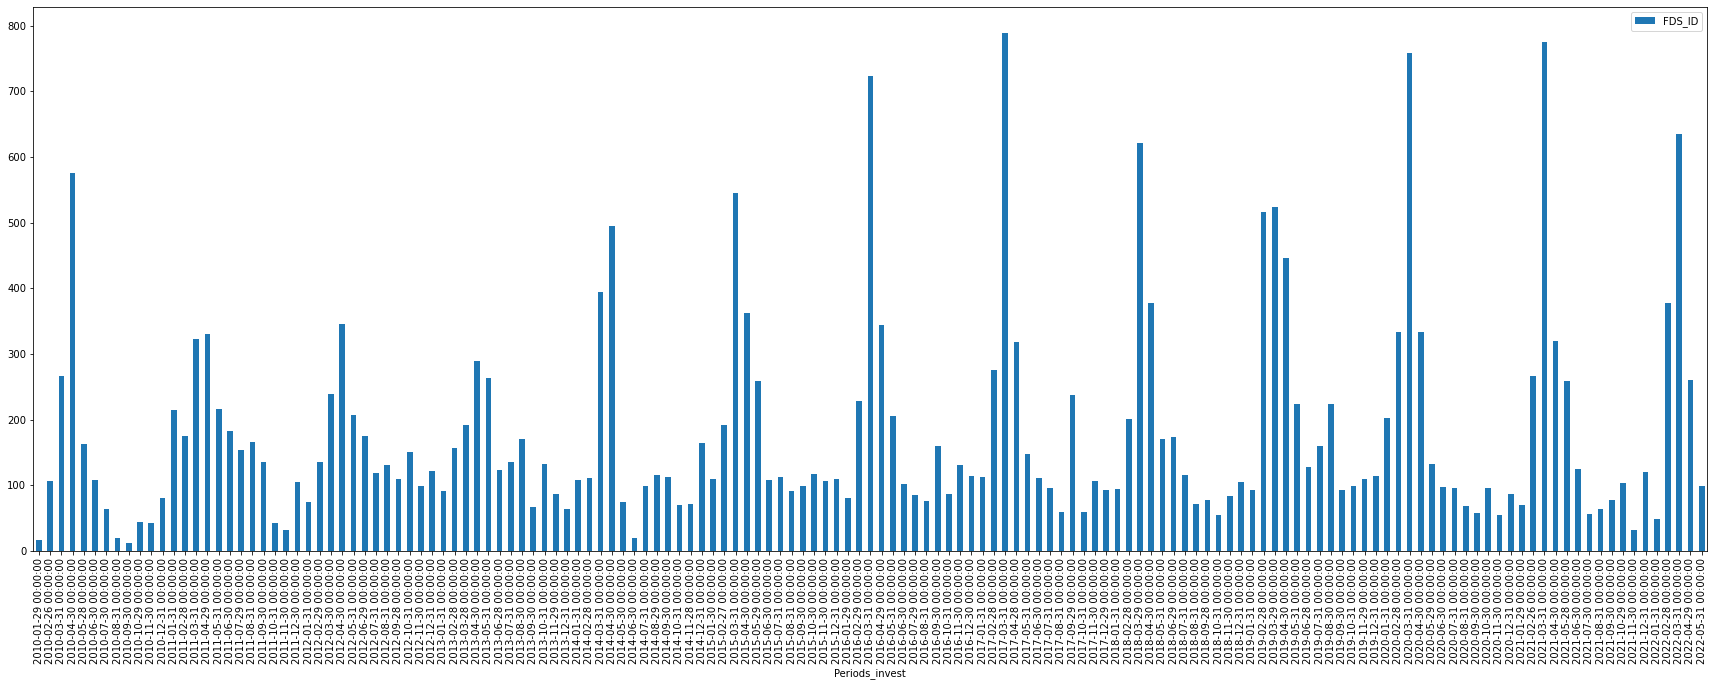

In [ ]:
# 공시 seasonality (4월) 확인됨
# source 기업이 START_DATE에 튀어나오고 END_DATE이 나올때까지는 sustain 해줘야 함.

source_no = merged.groupby(['Periods_invest'])['FDS_ID'].count().to_frame()
source_no.plot(kind='bar', figsize=(30,10))

In [625]:
merge['END_DATE'] = merge['END_DATE'].fillna('2022-05-31')

C:\Users\jchoi02\AppData\Local\Temp/ipykernel_26444/2715458928.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [626]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81618 entries, 2 to 140052
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   START_DATE        81618 non-null  datetime64[ns]
 1   END_DATE          81618 non-null  datetime64[ns]
 2   SOURCE_ENTITY_ID  81618 non-null  object        
 3   FDS_ID            81618 non-null  object        
 4   SOURCE_ENTITY     81618 non-null  object        
 5   TARGET_ENTITY_ID  81618 non-null  object        
 6   FDS_ID.1          81618 non-null  object        
 7   TARGET_ENTITY     81618 non-null  object        
 8   REL_TYPE          81618 non-null  object        
 9   REVENUE_PCT       20124 non-null  float64       
 10  Rel_periods       66268 non-null  float64       
 11  Company Name      81618 non-null  object        
 12  Periods           81618 non-null  datetime64[ns]
 13  Ticker            81618 non-null  object        
 14  PRICE             816

In [615]:
pd.date_range(start='2010-01-06', end='2011-10-13', freq='M')

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30'],
              dtype='datetime64[ns]', freq='M')

In [627]:
# START_DATE부터 END_DATE까지 price의 Periods 기준으로 forward 채워넣기
from dateutil.relativedelta import relativedelta
new_records = []
for i, row in merge.iterrows():
    # print(row)
    date_range = pd.date_range(start=row['START_DATE'], end=row['END_DATE'] + relativedelta(months=1), freq='M')
    for dt in date_range:
        row['between_period'] = dt
        new_records.append(row.copy())

In [628]:
merged_new = pd.DataFrame(new_records)

In [629]:
merged_new

,START_DATE,END_DATE,SOURCE_ENTITY_ID,FDS_ID,SOURCE_ENTITY,TARGET_ENTITY_ID,FDS_ID.1,TARGET_ENTITY,REL_TYPE,REVENUE_PCT,Rel_periods,Company Name,Periods,Ticker,PRICE,PRICE_USD,MCAP_USD,between_period
2,2010-01-06,2011-09-13,000M0T-E,IIVI-US,"II-VI, Inc.",0064CH-E,ELOS-US,Syneron Medical Ltd.,CUSTOMER,NaN,615.0,Syneron Medical Ltd,2009-12-31,ELOS-US,10.45,10.45,288.37,2010-01-31
2,2010-01-06,2011-09-13,000M0T-E,IIVI-US,"II-VI, Inc.",0064CH-E,ELOS-US,Syneron Medical Ltd.,CUSTOMER,NaN,615.0,Syneron Medical Ltd,2009-12-31,ELOS-US,10.45,10.45,288.37,2010-02-28
2,2010-01-06,2011-09-13,000M0T-E,IIVI-US,"II-VI, Inc.",0064CH-E,ELOS-US,Syneron Medical Ltd.,CUSTOMER,NaN,615.0,Syneron Medical Ltd,2009-12-31,ELOS-US,10.45,10.45,288.37,2010-03-31
2,2010-01-06,2011-09-13,000M0T-E,IIVI-US,"II-VI, Inc.",0064CH-E,ELOS-US,Syneron Medical Ltd.,CUSTOMER,NaN,615.0,Syneron Medical Ltd,2009-12-31,ELOS-US,10.45,10.45,288.37,2010-04-30
2,2010-01-06,2011-09-13,000M0T-E,IIVI-US,"II-VI, Inc.",0064CH-E,ELOS-US,Syneron Medical Ltd.,CUSTOMER,NaN,615.0,Syneron Medical Ltd,2009-12-31,ELOS-US,10.45,10.45,288.37,2010-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140047,2022-06-28,2022-05-31,0MDHNX-E,HSTO-US,"Histogen, Inc.",00DYYX-E,ABBV-US,"AbbVie, Inc.",CUSTOMER,NaN,NaN,"AbbVie, Inc.",2022-05-31,ABBV-US,147.37,147.37,260419.01,2022-06-30
140048,2022-06-28,2022-05-31,0HNKR3-E,ILPT-US,Industrial Logistics Properties Trust,001TR0-E,FDX-US,FedEx Corp.,CUSTOMER,4.8,NaN,FedEx Corporation,2022-05-31,FDX-US,224.58,224.58,58206.25,2022-06-30
140050,2022-06-28,2022-05-31,0015ZX-E,RPT-US,RPT Realty,0040KQ-E,DKS-US,"Dick's Sporting Goods, Inc.",CUSTOMER,3.8,NaN,"Dick's Sporting Goods, Inc.",2022-05-31,DKS-US,81.23,81.23,6541.23,2022-06-30
140051,2022-06-28,2022-05-31,0HNKR3-E,ILPT-US,Industrial Logistics Properties Trust,0013FQ-E,AES-US,The AES Corp.,CUSTOMER,1.0,NaN,AES Corporation,2022-05-31,AES-US,22.04,22.04,14719.63,2022-06-30


In [631]:
# 각 기간/Source 기업별 MCAP_USD 가장 큰 Customer만 남기기
grouped = merged_new.groupby(['between_period', 'FDS_ID']).agg({'MCAP_USD': max})

In [633]:
grouped = grouped.reset_index()

In [635]:
# SELF-JOIN: filter를 한 테이블과 join을하면, filter 된 값만 남음 
filtered_df = pd.merge(grouped, merged_new, how='inner')

In [636]:
filtered_df

,between_period,FDS_ID,MCAP_USD,START_DATE,END_DATE,SOURCE_ENTITY_ID,SOURCE_ENTITY,TARGET_ENTITY_ID,FDS_ID.1,TARGET_ENTITY,REL_TYPE,REVENUE_PCT,Rel_periods,Company Name,Periods,Ticker,PRICE,PRICE_USD
0,2010-01-31,ACV.XX1-US,203653.70,2010-01-13,2011-03-11,06LZX3-E,Alberto-Culver LLC,000YMS-E,WMT-US,"Walmart, Inc.",CUSTOMER,25.0,422.0,Wal-Mart Stores Inc.,2009-12-31,WMT-US,53.45,53.45
1,2010-01-31,AIPC-US,203653.70,2010-01-13,2010-07-30,001R85-E,American Italian Pasta Co.,000YMS-E,WMT-US,"Walmart, Inc.",CUSTOMER,25.0,198.0,Wal-Mart Stores Inc.,2009-12-31,WMT-US,53.45,53.45
2,2010-01-31,ATSC-US,1313.06,2010-01-07,2010-12-02,06NGQJ-E,ATS Corp.,000JHG-E,FNMA-US,Federal National Mortgage Association,CUSTOMER,10.0,329.0,Federal National Mortgage Association,2009-12-31,FNMA-US,1.18,1.18
3,2010-01-31,ATW-US,154462.56,2010-01-13,2011-01-19,000CDW-E,Atwood Oceanics LLC,000DP6-E,CVX-US,Chevron Corp.,CUSTOMER,NaN,371.0,Chevron Corporation,2009-12-31,CVX-US,76.99,76.99
4,2010-01-31,CBT-US,3414.37,2010-01-13,2011-02-01,000D61-E,Cabot Corp.,000L54-E,GT-US,Goodyear Tire & Rubber Co.,CUSTOMER,10.0,384.0,Goodyear Tire & Rubber Company,2009-12-31,GT-US,14.10,14.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281780,2022-06-30,ZQKSQ-US,9803.49,2011-02-04,2022-05-31,000V7L-E,"Boardriders, Inc.",000JHP-E,M-US,"Macy's, Inc.",CUSTOMER,NaN,NaN,Macy's Inc,2011-01-31,M-US,23.15,23.15
281781,2022-06-30,ZRPTAX-US,329802.03,2022-03-17,2022-05-31,00DV4X-E,"RREEF Property Trust, Inc.",000LR9-E,HD-US,"The Home Depot, Inc.",CUSTOMER,4.5,NaN,"Home Depot, Inc.",2022-02-28,HD-US,315.83,315.83
281782,2022-06-30,ZS-US,276496.88,2019-10-18,2022-05-31,07NR9R-E,"Zscaler, Inc.",069J8N-E,T-US,"AT&T, Inc.",CUSTOMER,NaN,NaN,AT&T Inc.,2019-09-30,T-US,37.84,37.84
281783,2022-06-30,ZTS-US,245381.15,2019-02-27,2022-05-31,05W76S-E,"Zoetis, Inc.",000TBT-E,PFE-US,Pfizer Inc.,CUSTOMER,NaN,NaN,Pfizer Inc.,2019-01-31,PFE-US,42.45,42.45
